In [2]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

working on blues...
blues.00000.wav
blues.00001.wav
blues.00002.wav
blues.00003.wav
blues.00004.wav
blues.00005.wav
blues.00006.wav
blues.00007.wav
blues.00008.wav
blues.00009.wav
blues.00010.wav
blues.00011.wav
blues.00012.wav
blues.00013.wav
blues.00014.wav
blues.00015.wav
blues.00016.wav
blues.00017.wav
blues.00018.wav
blues.00019.wav
blues.00020.wav
blues.00021.wav
blues.00022.wav
blues.00023.wav
blues.00024.wav
blues.00025.wav
blues.00026.wav
blues.00027.wav
blues.00028.wav
blues.00029.wav
blues.00030.wav
blues.00031.wav
blues.00032.wav
blues.00033.wav
blues.00034.wav
blues.00035.wav
blues.00036.wav
blues.00037.wav
blues.00038.wav
blues.00039.wav
blues.00040.wav
blues.00041.wav
blues.00042.wav
blues.00043.wav
blues.00044.wav
blues.00045.wav
blues.00046.wav
blues.00047.wav
blues.00048.wav
blues.00049.wav
blues.00050.wav
blues.00051.wav
blues.00052.wav
blues.00053.wav
blues.00054.wav
blues.00055.wav
blues.00056.wav
blues.00057.wav
blues.00058.wav
blues.00059.wav
blues.00060.wav
blue

KeyboardInterrupt: 

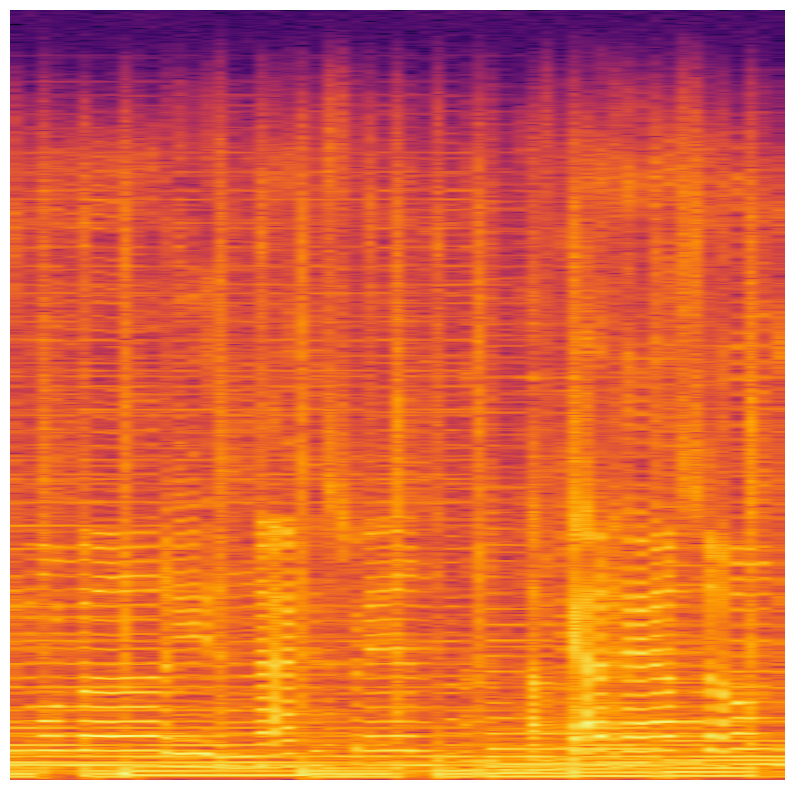

In [11]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    print('working on ' + g + '...')

    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./genres/{g}'):
        print(filename)
        
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

In [6]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [7]:

file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    print('working on ' + g + '...')
    
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

working on blues...


NoBackendError: 

# Import data from CSV

In [3]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.au,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.au,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.au,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.au,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.au,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [4]:
data.shape

(1000, 28)

In [5]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [6]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6912      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 48,714
Trainable params: 48,714
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
7/7 [==============================] - 1s 23ms/step - loss: 2.1866 - accuracy: 0.1925 - val_loss: 1.9652 - val_accuracy: 0.3200
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 1.8562 - accuracy: 0.3663 - val_loss: 1.7854 - val_accuracy: 0.3450
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 1.6385 - accuracy: 0.4087 - val_loss: 1.6464 - val_accuracy: 0.4150
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 1.4612 - accuracy: 0.4762 - val_loss: 1.5207 - val_accuracy: 0.4600
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 1.3387 - accuracy: 0.5337 - val_loss: 1.4408 - val_accuracy: 0.4750
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 1.2094 - accuracy: 0.5950 - val_loss: 1.3889 - val_accuracy: 0.5300
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 1.1367 - accuracy: 0.6062 - val_loss: 1.3340 - val_accuracy: 0.5400
Epoch 8/20
7/7 [=================

In [12]:
results = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.1321 - accuracy: 0.6200


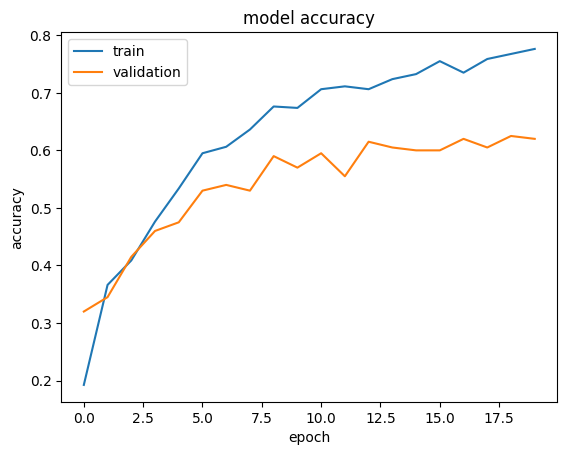

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

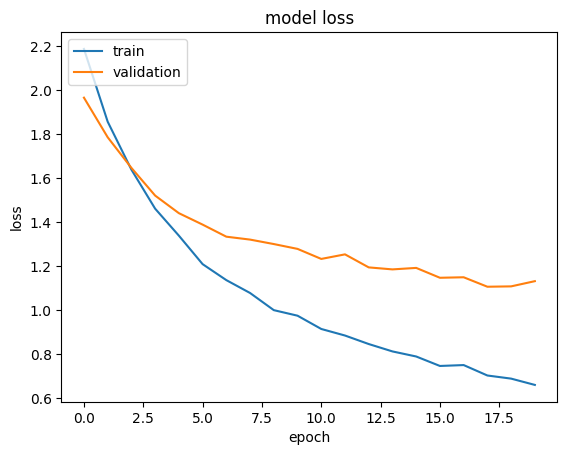

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
results

[1.1320770978927612, 0.6200000047683716]

In [16]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

7/7 [==============================] - 0s 1ms/step


6

In [17]:
x_val = x_train[:200]
partial_x_train = x_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

len(partial_y_train)

600

In [18]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/30
2/2 [==============================] - 0s 110ms/step - loss: 2.2860 - accuracy: 0.1467 - val_loss: 2.1477 - val_accuracy: 0.3250
Epoch 2/30
2/2 [==============================] - 0s 21ms/step - loss: 2.1040 - accuracy: 0.3867 - val_loss: 2.0105 - val_accuracy: 0.3350
Epoch 3/30
2/2 [==============================] - 0s 22ms/step - loss: 1.9453 - accuracy: 0.3783 - val_loss: 1.8830 - val_accuracy: 0.3250
Epoch 4/30
2/2 [==============================] - 0s 22ms/step - loss: 1.7846 - accuracy: 0.3883 - val_loss: 1.7702 - val_accuracy: 0.3450
Epoch 5/30
2/2 [==============================] - 0s 24ms/step - loss: 1.6549 - accuracy: 0.4050 - val_loss: 1.6691 - val_accuracy: 0.4050
Epoch 6/30
2/2 [==============================] - 0s 22ms/step - loss: 1.5436 - accuracy: 0.4650 - val_loss: 1.5678 - val_accuracy: 0.4300
Epoch 7/30
2/2 [==============================] - 0s 22ms/step - loss: 1.4416 - accuracy: 0.5133 - val_loss: 1.4818 - val_accuracy: 0.4200
Epoch 8/30
2/2 [==========

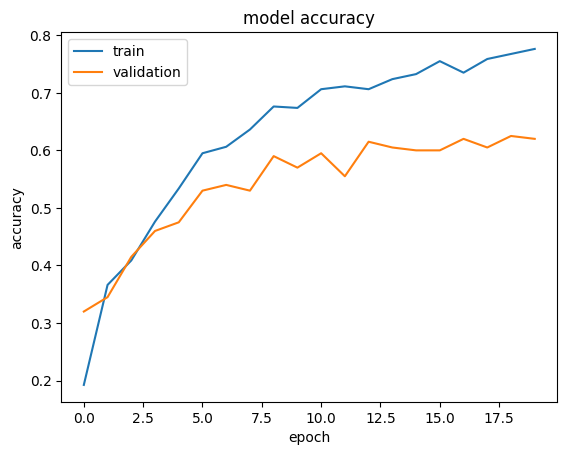

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

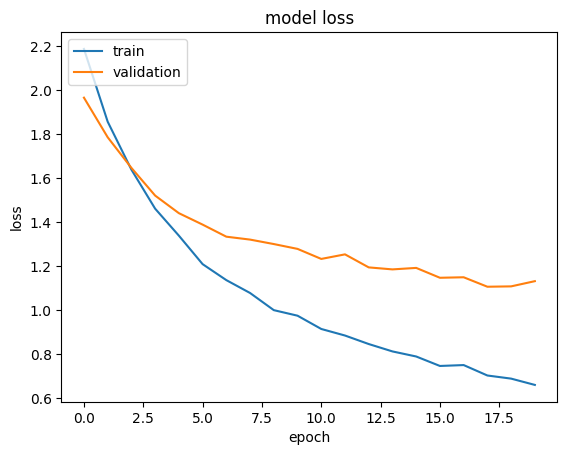

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
results = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.2972 - accuracy: 0.5600


In [22]:
results

[1.2971649169921875, 0.5600000023841858]

# Saving the model for UI

In [23]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "./Models/genre")